<a href="https://colab.research.google.com/github/caujw/fchollet/blob/main/chapter03_introduction-to-keras-and-tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Introduction to Keras and TensorFlow

## What's TensorFlow?

TensorFlow is a python based, free open source machine learning platform, developed by Google.

Compute the gradient of any differentiable expression.

Run not only on CPUs, but also on GPUs and TPUs, parallel hardware accelerators.

Computation defined in TensorFlow can be easily distributed.

TensorFlow programs can be exported to other runtimes.

TensorFlow is much more than a single library. It's really a platform, home to a vast ecosystem of components.

## What's Keras?

Keras is a deep learning API for python, built on top of TensorFlow

Provides a convenient way to define and train deep learning model.

Developed for research with the aim of enabling fast experimentation.

## Keras and TensorFlow: A brief history

## Setting up a deep-learning workspace

### Jupyter notebooks: The preferred way to run deep-learning experiments

### Using Colaboratory

#### First steps with Colaboratory

#### Installing packages with pip

#### Using the GPU runtime

## First steps with TensorFlow

#### Constant tensors and variables

**All-ones or all-zeros tensors**

In [2]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [6]:
# equivalent to

import numpy as np

np.ones(shape = (2, 1))

array([[1.],
       [1.]])

In [8]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [9]:
# equivalent to

np.zeros(shape = (2, 1))

array([[0.],
       [0.]])

**Random tensors**

In [16]:
# Tensor of random values drawn from a normal distribution with mean 0 and standard deviation 1

x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[-0.5001772]
 [ 1.2064688]
 [ 0.5246703]], shape=(3, 1), dtype=float32)


In [17]:
# equivalent to

np.random.normal(size = (3, 1), loc = 0., scale = 1.)

array([[-0.163446  ],
       [ 0.40463856],
       [-1.28609724]])

In [14]:
# Tensor of random values drawn from a uniform distribution between 0 and 1

x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.7760483 ]
 [0.8699    ]
 [0.49284184]], shape=(3, 1), dtype=float32)


In [15]:
# equivalent to

np.random.uniform(size = (3, 1), low = 0., high = 1)

array([[0.4706624 ],
       [0.48126762],
       [0.12999015]])

**NumPy arrays are assignable(TensorFlow tensors aren't assignable)**

In [21]:
x = np.ones(shape=(2, 2))
print(x)
x[0, 0] = 0.
print(x)

#텐서플로우에서는 불가능

[[1. 1.]
 [1. 1.]]
[[0. 1.]
 [1. 1.]]


**Creating a TensorFlow variable**

In [22]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

#tf.Variable is the class meant to manage modifiable state in TensorFlow

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.290532 ],
       [-0.9351689],
       [-0.2211088]], dtype=float32)>


**Assigning a value to a TensorFlow variable**

In [25]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

**Assigning a value to a subset of a TensorFlow variable**

In [27]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [2.],
       [2.]], dtype=float32)>

**Using `assign_add`**

In [28]:
v.assign_add(tf.ones((3, 1)))

# assign_add() : +=
# assign_sub() : -=

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [3.],
       [3.]], dtype=float32)>

#### Tensor operations: Doing math in TensorFlow

**A few basic math operations**

In [30]:
a = tf.ones((2, 2))
b = tf.square(a)  # take the square
c = tf.sqrt(a)  # take the square root
d = b + c  # add two tensors(element wise)
e = tf.matmul(a, b)  #take the product of two tensors
e *= d  # multiply two tensors(element wise)

Importantly, each of the preceding operations gets executed on the fly : at any point, you can print what the current result is, just like in NumPy. We call this eager execution(only possible in 2.0 version)

#### A second look at the GradientTape API

Here's something NumPy can't do

**Using the `GradientTape`**

In [36]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

print(input_var)
print(result)
print(gradient)

# Retrieve the gradients of the loss of a model with respect to its weights
# gradient = tape.gradient(loss, weight)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>
tf.Tensor(9.0, shape=(), dtype=float32)
tf.Tensor(6.0, shape=(), dtype=float32)


**Using `GradientTape` with constant tensor inputs**

In [37]:
# Only trainable variables are tracked by default. With a constant tensor, you'd have to manually mark it as being tracked by calling tape.watch() on it.

input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

print(input_const)
print(result)
print(gradient)

tf.Tensor(3.0, shape=(), dtype=float32)
tf.Tensor(9.0, shape=(), dtype=float32)
tf.Tensor(6.0, shape=(), dtype=float32)


**Using nested gradient tapes to compute second-order gradients**

In [ ]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

#### An end-to-end example: A linear classifier in pure TensorFlow

**Generating two classes of random points in a 2D plane**

In [40]:
num_samples_per_class = 1000

negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

# generate the first class of points: 1000 random 2D points. cov = [[1, 0.5], [0.5, 1]] corresponds to an oval-like point cloud oriented from bottom left to top right

positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

print(negative_samples)
print(positive_samples)

[[-0.26888165  4.13468434]
 [ 0.19299606  3.04691657]
 [-0.59286003  2.14137424]
 ...
 [ 0.53313327  3.18251254]
 [ 2.00297393  5.04888607]
 [ 0.95889029  3.98423615]]
[[ 0.77029752 -2.17173516]
 [ 6.00567011  0.18134922]
 [ 3.15243588 -0.95028282]
 ...
 [ 2.18390018 -0.25405359]
 [ 4.54140925 -1.25585752]
 [ 3.45952873  0.84084945]]


**Stacking the two classes into an array with shape (2000, 2)**

In [41]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

**Generating the corresponding targets (0 and 1)**

In [42]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

**Plotting the two point classes**

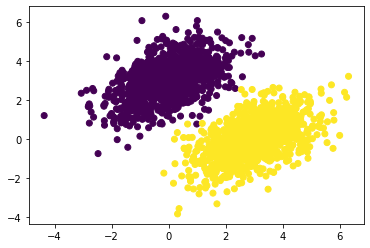

In [46]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets [:, 0])
plt.show()

**Creating the linear classifier variables**

In [48]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

# The output predictions will be a single score per sample(close to 0 if the sample is predicted to be in class 0, and close to 1 if the sample is predicted to be in class 1)

**The forward pass function**

In [49]:
def model(inputs):
    return tf.matmul(inputs, W) + b

**The mean squared error loss function**

In [50]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

**The training step function**

In [51]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**The batch training loop**

In [52]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 1.5025
Loss at step 1: 0.1638
Loss at step 2: 0.1103
Loss at step 3: 0.0968
Loss at step 4: 0.0895
Loss at step 5: 0.0835
Loss at step 6: 0.0781
Loss at step 7: 0.0733
Loss at step 8: 0.0689
Loss at step 9: 0.0649
Loss at step 10: 0.0613
Loss at step 11: 0.0580
Loss at step 12: 0.0550
Loss at step 13: 0.0523
Loss at step 14: 0.0498
Loss at step 15: 0.0476
Loss at step 16: 0.0456
Loss at step 17: 0.0437
Loss at step 18: 0.0421
Loss at step 19: 0.0406
Loss at step 20: 0.0392
Loss at step 21: 0.0379
Loss at step 22: 0.0368
Loss at step 23: 0.0358
Loss at step 24: 0.0349
Loss at step 25: 0.0340
Loss at step 26: 0.0332
Loss at step 27: 0.0326
Loss at step 28: 0.0319
Loss at step 29: 0.0313
Loss at step 30: 0.0308
Loss at step 31: 0.0304
Loss at step 32: 0.0299
Loss at step 33: 0.0295
Loss at step 34: 0.0292
Loss at step 35: 0.0289
Loss at step 36: 0.0286
Loss at step 37: 0.0283
Loss at step 38: 0.0281
Loss at step 39: 0.0279


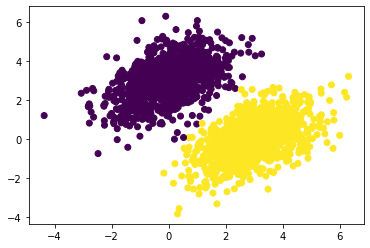

In [53]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

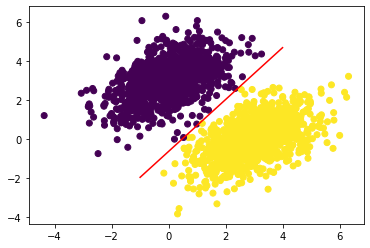

In [54]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

## Anatomy of a neural network: Understanding core Keras APIs

### Layers: The building blocks of deep learning

#### The base Layer class in Keras

Layer is object that encapsulates some state (weights) and computation (forward pass)

weights are typically defined in a build()

**A `Dense` layer implemented as a `Layer` subclass**

In [55]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [56]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


#### Automatic shape inference: Building layers on the fly

In [57]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [58]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [59]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

### From layers to models

### The "compile" step: Configuring the learning process

In [60]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [61]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

### Picking a loss function

Choosing the right loss function for the right problem is extremly important

There are simple guidelines you can follow to choose
1. Binary crossentropy for a two-class classification
2. Categorical crossentropy for a many-class classification problem
3. Mean squared error for regression problem


### Understanding the fit() method

key arguments:
1. The data(inputs and targets) to train on: Numpy arrays or a TensorFlow Dataset object
2. The number of epochs to train for: how many times the training loop iterate over the data passed.
3. The batch size to use within each epoch of mini-batch gradient descent: the number of training examples considered to compute the gradients for one weight update step.

**Calling `fit()` with NumPy data**

In [62]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
16/16 [==============================] - 1s 2ms/step - loss: 2.4074 - binary_accuracy: 0.0085
Epoch 2/5
16/16 [==============================] - 0s 2ms/step - loss: 2.2270 - binary_accuracy: 0.0090
Epoch 3/5
16/16 [==============================] - 0s 3ms/step - loss: 2.0775 - binary_accuracy: 0.0095
Epoch 4/5
16/16 [==============================] - 0s 2ms/step - loss: 1.9369 - binary_accuracy: 0.0095
Epoch 5/5
16/16 [==============================] - 0s 2ms/step - loss: 1.8011 - binary_accuracy: 0.0105


In [63]:
history.history

{'binary_accuracy': [0.008500000461935997,
  0.008999999612569809,
  0.009499999694526196,
  0.009499999694526196,
  0.010499999858438969],
 'loss': [2.4074246883392334,
  2.2269890308380127,
  2.077462911605835,
  1.9368635416030884,
  1.801131248474121]}

### Monitoring loss and metrics on validation data

**Using the `validation_data` argument**

In [64]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 1s 4ms/step - loss: 0.4137 - binary_accuracy: 0.8950 - val_loss: 0.2237 - val_binary_accuracy: 0.8133
Epoch 2/5
88/88 [==============================] - 0s 3ms/step - loss: 0.0745 - binary_accuracy: 0.9464 - val_loss: 0.0486 - val_binary_accuracy: 0.9833
Epoch 3/5
88/88 [==============================] - 0s 3ms/step - loss: 0.0713 - binary_accuracy: 0.9593 - val_loss: 0.0908 - val_binary_accuracy: 0.9700
Epoch 4/5
88/88 [==============================] - 0s 3ms/step - loss: 0.0790 - binary_accuracy: 0.9486 - val_loss: 0.0303 - val_binary_accuracy: 0.9983
Epoch 5/5
88/88 [==============================] - 0s 3ms/step - loss: 0.0700 - binary_accuracy: 0.9614 - val_loss: 0.0474 - val_binary_accuracy: 0.9883


### Inference: Using a model after training

In [65]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

[[ 0.01634493]
 [ 0.6951004 ]
 [ 0.56675804]
 [ 0.73886013]
 [ 0.5833992 ]
 [-0.16445711]
 [ 0.97383344]
 [-0.08240375]
 [ 0.8002336 ]
 [ 0.7240303 ]]


## Summary